# Descriptive Statistics Analyses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance = pd.read_csv('D:/PACMANN AI/Tugas Akhir/Tugas Akhir Aug - Oct/Final Project Prob/insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Rata-rata umur pengguna asuransi
avg_age = np.mean(insurance['age'])
print(f"Rata-rata umur pengguna asuransi: {avg_age:.0f}")

Rata-rata umur pengguna asuransi: 39


In [5]:
# Statement untuk perokok
smoker = insurance['smoker'] == 'yes'

# Rata-rata bmi pengguna asuransi yang perokok
avg_bmi_smokers = np.mean(insurance['bmi'][smoker])
avg_bmi_nonsmokers = np.mean(insurance['bmi'][~smoker])
print(f"Rata-rata BMI perokok: {avg_bmi_smokers:.2f}")
print(f"Rata-rata BMI bukan perokok: {avg_bmi_nonsmokers:.2f}")

Rata-rata BMI perokok: 30.71
Rata-rata BMI bukan perokok: 30.65


In [6]:
# Rata-rata tagihan perokok
avg_charges_smokers = np.mean(insurance['charges'][smoker])

# Rata-rata tagihan bukan perokok
avg_charges_nonsmokers = np.mean(insurance['charges'][~smoker])

print(f"Rata-rata tagihan perokok: {avg_charges_smokers:.2f}")
print(f"Rata-rata tagihan bukan perokok: {avg_charges_nonsmokers:.2f}")

Rata-rata tagihan perokok: 32050.23
Rata-rata tagihan bukan perokok: 8434.27


In [7]:
# Rata-ata BMI umur di atas 25 perokok dan bukan perokok

umur_25 = insurance['age'] > 25

avg_bmi_25_smokers = np.mean(insurance['bmi'][smoker & umur_25])

avg_bmi_25_nonsmokers = np.mean(insurance['bmi'][~smoker & umur_25])

print(f"Rata-rata BMI umur lebih dari 25 dan perokok: {avg_bmi_25_smokers:.2f}")
print(f"Rata-rata BMI umur lebih dari 25 dan bukan perokok: {avg_bmi_25_nonsmokers:.2f}")

Rata-rata BMI umur lebih dari 25 dan perokok: 30.58
Rata-rata BMI umur lebih dari 25 dan bukan perokok: 30.93


In [8]:
male = insurance['sex'] == 'male'

# Rata-rata BMI pria
avg_bmi_male = np.mean(insurance['bmi'][male])
avg_bmi_female = np.mean(insurance['bmi'][~male])

print(f"Rata-rata BMI pria: {avg_bmi_male:.2f}")
print(f"Rata-rata BMI wanita: {avg_bmi_female:.2f}")

Rata-rata BMI pria: 30.94
Rata-rata BMI wanita: 30.38


# Categorical Variable Analyses

In [9]:
# Pengeluaran tertinggi berdasarkan jenis kelamin
max_male_charge = np.max(insurance['charges'][male])
max_female_charge = np.max(insurance['charges'][~male])

print(f"Pengeluaran tertinggi pria: {max_male_charge}")
print(f"Pengeluaran tertinggi wanita: {max_female_charge}")

Pengeluaran tertinggi pria: 62592.87309
Pengeluaran tertinggi wanita: 63770.42801


In [64]:
# Proporsi data perokok dan bukan perokok
p_smokers = len(insurance[smoker]) * 100/len(insurance)
p_nonsmokers = len(insurance[~smoker]) * 100/len(insurance)

print(f"Persentasi data total perokok: {p_smokers:.2f}%")
print(f"Persentasi data total bukan perokok: {p_nonsmokers:.2f}%")

Persentasi data total perokok: 20.48%
Persentasi data total bukan perokok: 79.52%


In [11]:
# Peluang berdasarkan jenis kelamin

n_smokers = len(insurance[smoker])

p_male_smoker = len(insurance[smoker & male])/len(insurance[smoker])

p_female_smoker = len(insurance[smoker & ~male])/len(insurance[smoker])

print(f"Peluang pria perokok: {p_male_smoker:.2f}")
print(f"Peluang wanita perokok: {p_female_smoker:.2f}")

Peluang pria perokok: 0.58
Peluang wanita perokok: 0.42


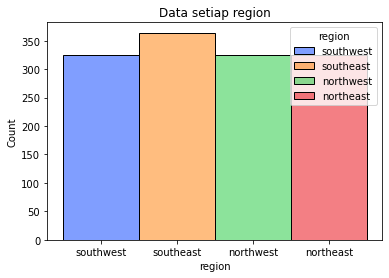

In [67]:
# Distribusi tiap-tiap region

sns.histplot(data=insurance, x='region', hue='region', palette='bright')
plt.title('Data setiap region')
plt.show()

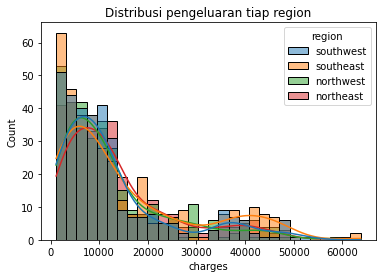

In [13]:
# Distribusi pengeluaran tiap region

sns.histplot(data=insurance, x='charges', hue='region', kde=True)
plt.title('Distribusi pengeluaran tiap region')
plt.show()

# Continuous Variable Analysis

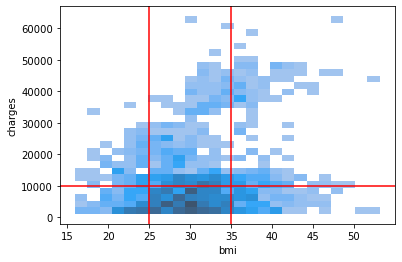

In [14]:
# Peluang besar tagihan berdasarkan BMI

sns.histplot(data=insurance, x='bmi', y='charges')
plt.axhline(y=10000, color='red')
plt.axvline(x=25, color='red')
plt.axvline(x=35, color='red')
plt.show()

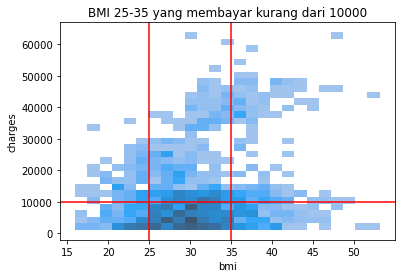

In [15]:
# Peluang besar tagihan berdasarkan BMI

sns.histplot(data=insurance, x='bmi', y='charges')
plt.title('BMI 25-35 yang membayar kurang dari 10000')
plt.axhline(y=10000, color='red')
plt.axvline(x=25, color='red')
plt.axvline(x=35, color='red')
plt.show()

In [16]:
# Peluang perokok dengan BMI lebih dari 25 dan pengeluaran tagihan lebih dari 16700

bmi_over_25 = insurance['bmi'] > 25
charged_167k = insurance['charges'] > 16700

In [17]:
n_Y_Z = len(insurance[bmi_over_25 & smoker])
n_X_Y_Z = len(insurance[charged_167k & bmi_over_25 & smoker])

# Peluang dari event
p_X_given_Y_Z = n_X_Y_Z/n_Y_Z

print(f"Peluang perokok dengan BMI lebih dari 25 dan pengeluaran tagihan lebih dari 16700: {p_X_given_Y_Z:.2f}")

Peluang perokok dengan BMI lebih dari 25 dan pengeluaran tagihan lebih dari 16700: 0.98


In [18]:
# Peluang acak perokok dengan tagihan lebih dari 16700
n_Z = len(insurance[smoker])
n_X_Z = len(insurance[charged_167k & smoker])

In [19]:
p_X_given_Z = n_X_Z/n_Z

print(f"Peluang acak perokok dengan tagihan lebih dari 16700: {p_X_given_Z:.2f}")

Peluang acak perokok dengan tagihan lebih dari 16700: 0.93


In [20]:
# BMI lebih dari 25 dan tagihan lebih dari 16700
n_Y = len(insurance[bmi_over_25])
n_X_Y = len(insurance[bmi_over_25 & charged_167k])

In [21]:
p_X_given_Y = n_X_Y/n_Y

print(f"Peluang seorang dengan BMI lebih dari 25 dan membayar lebih dari 16.7k: {p_X_given_Y:.2f}")

Peluang seorang dengan BMI lebih dari 25 dan membayar lebih dari 16.7k: 0.26


In [22]:
# BMI kurang dari 25 tagihan lebih dari 16.7k
n_Y = len(insurance[~bmi_over_25])
n_X_Y = len(insurance[~bmi_over_25 & charged_167k])

In [23]:
p_X_given_Y = n_X_Y/n_Y

print(f"Peluang seorang dengan BMI kurang dari 25 dan membayar lebih dari 16.7k: {p_X_given_Y:.2f}")

Peluang seorang dengan BMI kurang dari 25 dan membayar lebih dari 16.7k: 0.21


In [24]:
# Perokok dengan BMI lebih dari 25 dan membayar lebih dari 16700
n_X_Y_Z1 = len(insurance[charged_167k & bmi_over_25 & smoker])
n_Y_Z1 = len(insurance[bmi_over_25 & smoker])

In [25]:
p_X_given_Y_Z1 = n_X_Y_Z1/n_Y_Z1

print(f"Peluang perokok dengan BMI lebih dari 25 dan membayar lebih dari 16700: {p_X_given_Y_Z1:.2f}")

Peluang perokok dengan BMI lebih dari 25 dan membayar lebih dari 16700: 0.98


In [26]:
# Bukan perokok dengan BMI lebih dari 25 dan membayar lebih dari 16700
n_X_Y_Z0 = len(insurance[charged_167k & bmi_over_25 & (~smoker)])
n_Y_Z0 = len(insurance[bmi_over_25 & (~smoker)])

In [27]:
p_X_given_Y_Z0 = n_X_Y_Z0/n_Y_Z0

print(f"Peluang bukan perokok dengan BMI lebih dari 25 dan membayar lebih dari 16700: {p_X_given_Y_Z0:.2f}")

Peluang bukan perokok dengan BMI lebih dari 25 dan membayar lebih dari 16700: 0.08


# Correlation Analyeses

In [28]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
# Correlation
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [30]:
pip install statistics

In [35]:
import statistics

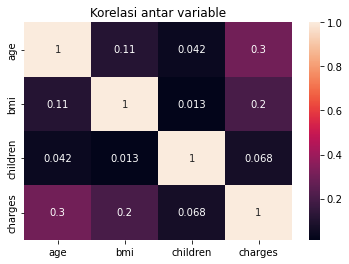

In [40]:
corr = insurance.corr()
sns.heatmap(corr, annot=True)
plt.title('Korelasi antar variable')
plt.show()


Hypothesis Testing

Q1: Are the charges of smokers higher than that of nonsmokers?


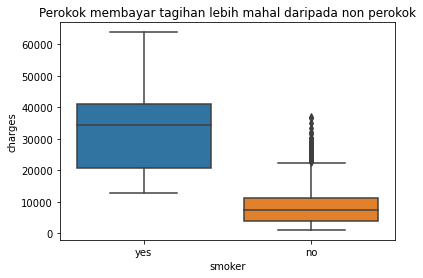

In [41]:
sns.boxplot(data=insurance, x='smoker', y='charges')
plt.title("Perokok membayar tagihan lebih mahal daripada non perokok")
plt.show()

In [42]:
charges_smokers = insurance['charges'][smoker]
charges_nosmokers = insurance['charges'][~smoker]

In [51]:
from scipy.stats import ttest_ind
st, p_value = ttest_ind(a=charges_smokers, b=charges_nosmokers, equal_var=False, alternative='less')

In [44]:
print(f"Stat value: {st}")
print(f"p-value: {p_value}")

Stat value: 32.751887766341824
p-value: 1.0


In [45]:
# Data yang digunakan
insurance_mod = insurance.copy()
insurance_mod['bmi_over_25'] = np.where(insurance['bmi'] > 25, 'yes', 'no')
insurance_mod.head()

,age,sex,bmi,children,smoker,region,charges,bmi_over_25
0,19,female,27.900,0,yes,southwest,16884.92400,yes
1,18,male,33.770,1,no,southeast,1725.55230,yes
2,28,male,33.000,3,no,southeast,4449.46200,yes
3,33,male,22.705,0,no,northwest,21984.47061,no
4,32,male,28.880,0,no,northwest,3866.85520,yes


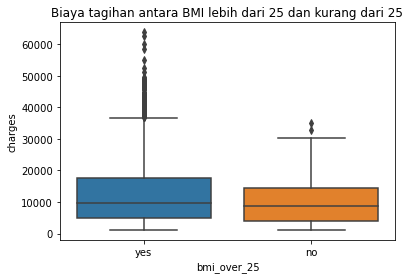

In [47]:
sns.boxplot(x='bmi_over_25', y='charges', data=insurance_mod)
plt.title('Biaya tagihan antara BMI lebih dari 25 dan kurang dari 25')
plt.show()

In [48]:
charge_over_25 = insurance_mod['charges'][insurance_mod['bmi_over_25'] == 'yes']
charge_less_25 = insurance_mod['charges'][insurance_mod['bmi_over_25'] == 'no']

In [49]:
print(f"Varian tagihan dengan BMI lebih dari 25: {np.var(charge_over_25):.2f}")
print(f"Varian tagihan dengan BMI kurang dari25: {np.var(charge_less_25):.2f}")

Varian tagihan dengan BMI lebih dari 25: 164579189.52
Varian tagihan dengan BMI kurang dari25: 55940041.24


In [52]:
st, p_val = ttest_ind(a=charge_over_25, b=charge_less_25, equal_var=False, alternative='greater')

In [53]:
print(f"Statistics value: {st}")
print(f"p-value: {p_val}")

Statistics value: 5.953486371741479
p-value: 2.198585436885263e-09


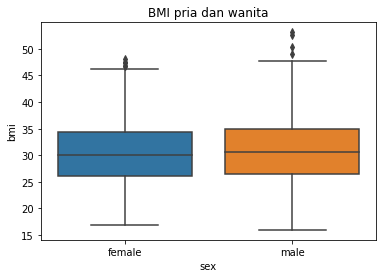

In [55]:
sns.boxplot(x = 'sex', y = 'bmi', data = insurance_mod)
plt.title("BMI pria dan wanita")
plt.show()

In [60]:
bmi_pria = insurance_mod['bmi'][male]
bmi_wanita = insurance_mod['bmi'][~male]

In [61]:
print(f"Varian BMI dari pria: {np.var(bmi_pria):.2f}")
print(f"Varian BMI dari wanita: {np.var(bmi_wanita):.2f}")

Varian BMI dari pria: 37.65
Varian BMI dari wanita: 36.50


In [62]:
st, p_val = ttest_ind(a=bmi_pria, b=bmi_wanita, equal_var=True, alternative='greater')

In [63]:
print(f"Stats value: {st}")
print(f"p-value: {p_val}")

Stats value: 1.696752635752224
p-value: 0.04498818589492466
